#Αριθμητική Ανάλυση Ομάδα Ασκήσεων 1
##Ποζουκίδης Δημήτρης 15016

##**Link notebook:**

[https://colab.research.google.com/drive/1ZvlsY-h70o-9dpLCmIWv_hhpt9Vim5qo?usp=sharing](https://colab.research.google.com/drive/1ZvlsY-h70o-9dpLCmIWv_hhpt9Vim5qo?usp=sharing)

##Θέμα 1 και 2

##Θέμα 1 Με το χέρι:

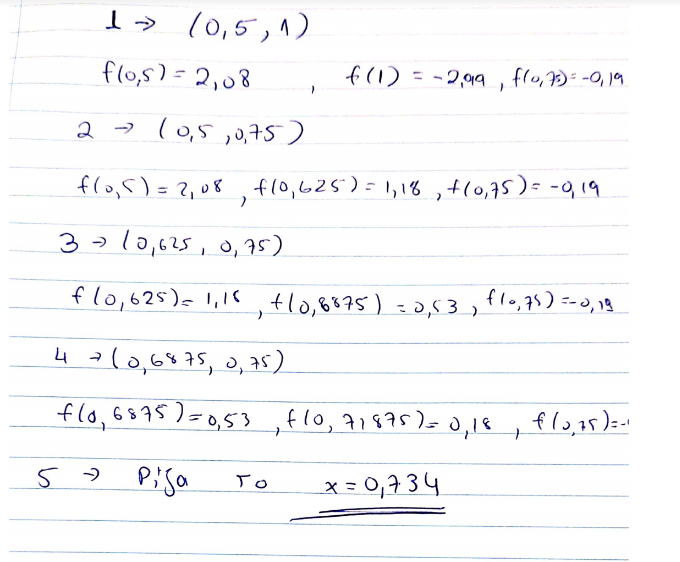

##Θέμα 1 Κώδικας:

In [ ]:
import math
import sympy as sym
from sympy import *

###Bisection

In [ ]:
def bisection(a,b,f,maxError):
    print("==================================")
    print("Bisection Method")
    m=(a+b)/2
    i=1
    Roots=[m]

    while abs(f(m))>=maxError:       
        i=i+1
        if f(a)*f(m)<0:
            b=m
        else:
            a=m
        m=(a+b)/2
        Roots.append(m)
    
    printer(a,f,i) 
    checkError(Roots,1)       

###Linear Interpolation

In [ ]:
def linearInt(a,b,f,maxError):
    print("==================================")
    print("Linear Interpolation:")
    Roots=[]
    i=0 
    while abs(f(a))>=maxError:
        i=i+1       
        a=b-f(b)*(b-a)/(f(b)-f(a))
        Roots.append(a)
    checkError(Roots,2)
    printer(a,f,i)

###Newton Raphson

In [ ]:
def NR(a,f,fp,maxError):
    print("==================================")
    print("Newton Raphson")
    i=0
    Errors=[]
    while abs(f(a))>=maxError:
        i=i+1
        e=f(a)/fp(a)
        Errors.append(e)
        a=a-e  
    checkError(Errors,3)      
    printer(a,f,i)

###x=g(x)

In [ ]:
def gx(f,g,a,maxError):
    print("==================================")
    print("x=g(x)")
    i=0
    
    while abs(f(a))>=maxError:
        a=g(a)
        i=i+1
    printer(a,f,i)

### Εκτύπωση αποτελεσμάτων

In [ ]:
def printer(a,f,i):
    print("Root=",a)
    print("f(Root)=",f(a))
    print("Number of tries:",i)

### Έλεγχος σύγκλισης

In [ ]:
def checkError(Roots,method):
    print("ERROR CHECK")
    
    if method==1:
      initError=abs(Roots[1]-Roots[-1])
      fError=abs(Roots[-2]-Roots[-1])
      eError=abs(initError*0.5**(len(Roots)-2))
      print("Initial error (Step 2):",initError,"Final error (Step n-1):",fError)
      print("Expected error:",eError)
      print("Final/Expected:",fError/eError)
    elif method==2:
      for i in range (0,len(Roots)-1):
        e1=abs(Roots[-1]-Roots[i])
        e2=abs(Roots[-1]-Roots[i+1])
        k=e2/(e1**1.618)
        print("k:",k)
    else:
      for i in range (0,len(Roots)-1):
        k=abs(Roots[i+1]/Roots[i]**2)
        print("k=",k)   

###Main Θέμα 1 

In [ ]:
def main1():
    x=sym.Symbol('x')
    exp1=2*x+3*sym.sin(4*x)-sym.exp(x)
    exp2=(exp(x)-3*sin(4*x)-11*x)/(-9)
    diffexp=exp1.diff(x)
    
    f=sym.lambdify(x,exp1)
    fp=sym.lambdify(x,diffexp)
    g=sym.lambdify(x,exp2)
        
    a=0.5
    b=1
    maxErrors=[1e-03,1e-06,1e-12]

    for maxError in maxErrors:
        print("MAXIMAL ALLOWED ERROR:",maxError)
        bisection(a,b,f,maxError)
        linearInt(a,b,f,maxError)
        NR(a,f,fp,maxError)
        gx(f,g,(a+b)/2,maxError)
        print("\n")

In [ ]:
main1()

MAXIMAL ALLOWED ERROR: 0.001
Bisection Method
Root= 0.733642578125
f(Root)= 0.0012723347403122975
Number of tries: 12
ERROR CHECK
Initial error (Step 2): 0.1087646484375 Final error (Step n-1): 0.0001220703125
Expected error: 0.0001062154769897461
Final/Expected: 1.149270482603816
Linear Interpolation:
ERROR CHECK
k: 0.3099278504521813
k: 0.0
Root= 0.7336994294079797
f(Root)= 0.0005999682497600523
Number of tries: 3
Newton Raphson
ERROR CHECK
k= 1.2297019291793643
k= 0.5471221554673619
k= 0.6702643450684698
Root= 0.7337504322873647
f(Root)= -3.263410576437309e-06
Number of tries: 4
x=g(x)
Root= 0.7336992939928466
f(Root)= 0.0006015698179238083
Number of tries: 5


MAXIMAL ALLOWED ERROR: 1e-06
Bisection Method
Root= 0.7337498664855957
f(Root)= 3.4287257916210123e-06
Number of tries: 21
ERROR CHECK
Initial error (Step 2): 0.1087501049041748 Final error (Step n-1): 2.384185791015625e-07
Expected error: 2.0742436390719377e-07
Final/Expected: 1.1494241785802763
Linear Interpolation:
ERROR C

Ρίζα της εξίωσης: $x=0.7337501563750596$

**Σχόλια**: Παρατηρούμε πως η καλύτερη μέθοδος επίλυσης της εξίσωσης είναι η μέθοδος Newton Raphson, που χρειάζεται τις λιγότερες επαναλήψεις όποια και αν είναι η ακρίβεια, ενώ χειρότερη είναι η $x=g(x)$. Παρατηρούμε επίσης πως συγκρίνοντας το σφάλμα σε κάθε βήμα, μπορούμε να επιβεβαιώσουμε πως για την περίπτωση της bisection method το σφάλμα μειώνεται σε κάθε βήμα στο μισό, στη μέθοδο Newton Raphson το σφάλμα μειώνεται τετραγωνικά. Στη περίπτωση της γραμμικής παρεμβολής δε μπόρεσε να επιβεβαιωθεί ο ρυθμός μείωσης τους σφάλματος. Ίσως ο ρύθμος μείωσης $e_{n+1} \approx ke^{1.618}_n$ να ισχύει για κάποια βελτιωμένη έκδοση της μεθόδου, όπως όταν δε συγκλίνουμε μόνο από τη μια μεριά.

Η συνάρτηση που χρησιμοποιήθηκε για $g(x)$ είναι η $g(x)-\frac{1}{9}(e^x-3sin(4x)-11x)$ η οποία βρέθηκε αφαιρώντας $ax$ από κάθε μέλος της αρχικής εξίσωσης. Ύστερα η σχέση παραγωγίστηκε και λύθηκε ως προς $a$ έτσι ώστε το τελικό αποτέλεσμα να δώσει $|g'(x)|<1$.

##Θέμα 3

###Newton Raphson για συστήματα

In [ ]:
   def systemNR(x,y,f,fx,fy,g,gx,gy,maxError):
    while abs(f(x,y))>=maxError or abs(g(x,y))>=maxError:
        x=x-(f(x,y)*gy(x,y)-g(x,y)*fy(x,y))/(fx(x,y)*gy(x,y)-gx(x,y)*fy(x,y))
        y=y-(g(x,y)*fx(x,y)-f(x,y)*gx(x,y))/(fx(x,y)*gy(x,y)-gx(x,y)*fy(x,y))
    print("x,y=",x,",",y)   

###Main Θέμα 3

In [ ]:
def main2():
    x=sym.Symbol('x')
    y=sym.Symbol('y')
    f=2*x-exp(x)+3-y
    g=0.5*x-2*x**3-y
    fx=f.diff(x)
    fy=f.diff(y)
    gx=g.diff(x)
    gy=g.diff(y)
    
    f=sym.lambdify([x,y],f)
    g=sym.lambdify([x,y],g)
    fx=sym.lambdify([x,y],fx)
    fy=sym.lambdify([x,y],fy)
    gx=sym.lambdify([x,y],gx)
    gy=sym.lambdify([x,y],gy)
    
    maxError=0.001
    print("MAXIMAL ALLOWED ERROR:",maxError)
    systemNR(6,0,f,fx,fy,g,gx,gy,maxError)
    systemNR(0,0,f,fx,fy,g,gx,gy,maxError)

In [ ]:
main2()

MAXIMAL ALLOWED ERROR: 0.001
x,y= 6.185272944814308 , -470.1746427873522
x,y= -0.8627112065118193 , 0.8526364876825402


Λύσεις του συστήματος:

$(x_1,y_1)=(6.185272944814308,-470.1746427873522)$ και $(x_2,y_2)=(-0.8627112065118193,0.8526364876825402)$

**Σχόλια**: Χρησιμοποιήθηκε η μέθοδος Newton Raphson για συστήματα η οποία έψαξε ρίζες μία φορά κοντά στο $(0,0)$ και μία φορά κοντά στο $(6,0)$ για να βρεθούν οι δύο λύσεις του συστήματος. Η μέθοδος $x=g(x)$ για συστήματα είναι δύσκολο να χρησιμοποιηθεί γιατί η εξίσωση που μπορεί να λυθεί ως προς $x$ είναι τρίτου βαθμού ως προς $x$.